**INTRODUCTION:**

Learning by doing

In [112]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

['heart.csv']


In [113]:
#Loading the data set
heart = pd.read_csv("../input/heart.csv")

In [114]:
#Checking top few rows of the data
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [115]:
#Checking the structure of the data set
#There are 303 observations and 14 variables in the data set

print(heart.shape)

(303, 14)


In [116]:
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None


In [117]:
#Let's sum the null values for each column

heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [118]:
#This calculates the percent of missing values in eac column of the data set.
#The results are 0 because there are no null values here.
#I am doing this for practice purpose.

round(100*(heart.isnull().sum()/len(heart.index)),2)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [119]:
#Finding the statistical features of the data set using describe function.

heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


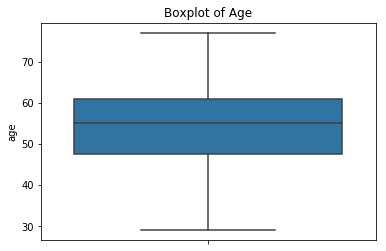

In [120]:
#Density and histogram plots

sns.boxplot(y= heart['age'])
plt.title('Boxplot of Age')
plt.show()

#We can see that the median age here is around 55 years
#Also most of the observations have age between 47-61 years

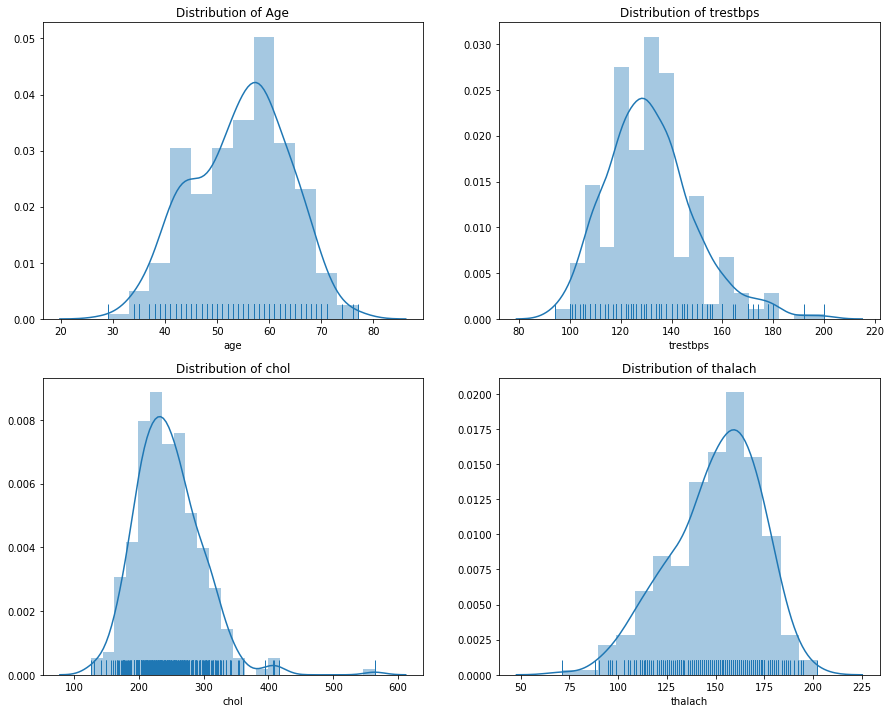

In [121]:
#Creating subplots
plt.figure(figsize=(15, 12))

#Subplot1 
plt.subplot(2,2,1)
plt.title('Distribution of Age')
sns.distplot(heart['age'], rug = True)


#Subplot2
plt.subplot(2,2,2)
plt.title('Distribution of trestbps')
sns.distplot(heart['trestbps'], rug = True)


#Subplot3
plt.subplot(2,2,3)
plt.title('Distribution of chol')
sns.distplot(heart['chol'], rug = True)


#Subplot4
plt.subplot(2,2,4)
plt.title('Distribution of thalach')
sns.distplot(heart['thalach'], rug = True)

plt.show()

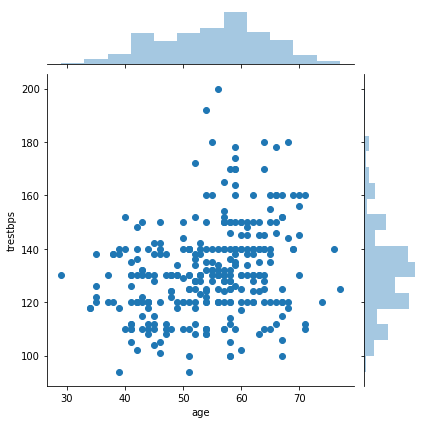

In [122]:
#plt.figure(figsize=(10, 6))

#scatter plot of age and trestbps
sns.jointplot('age','trestbps',heart)
plt.show()

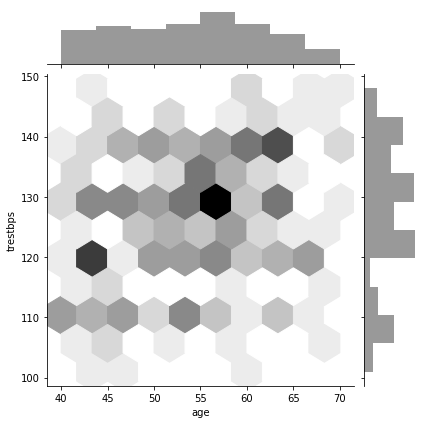

In [123]:
#Let's dig deeper into the concentrated part, where trestbps is less than 150 and age is between 40-70

df1 = heart[(heart.trestbps <150) & (heart.trestbps > 100) & (heart.age <= 70) & (heart.age >=40)]

sns.jointplot('age','trestbps',df1, kind="hex", color = 'k')
plt.show()

#More concentration can be found in case of age between 55-58 and trestbps 130

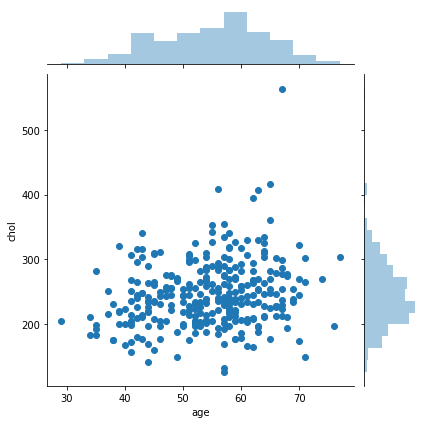

In [124]:
#scatter plot of age and trestbps
sns.jointplot('age','chol',heart)
plt.show()

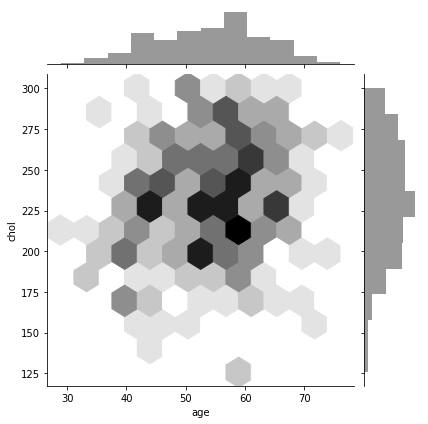

In [125]:
#Visualizing the concentrated part for chol

df2 = heart[(heart.chol <=300)]
sns.jointplot('age','chol',df2, kind = 'hex', color = 'k')
plt.show()

#More concentration can be found in case of age between 50-60 and chol 200-250

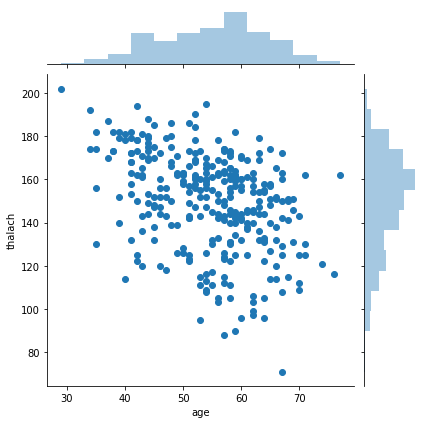

In [126]:
#scatter plot of age and thalach

sns.jointplot('age','thalach', heart)
plt.show()

#shows a decreasing pattern

<Figure size 1080x864 with 0 Axes>

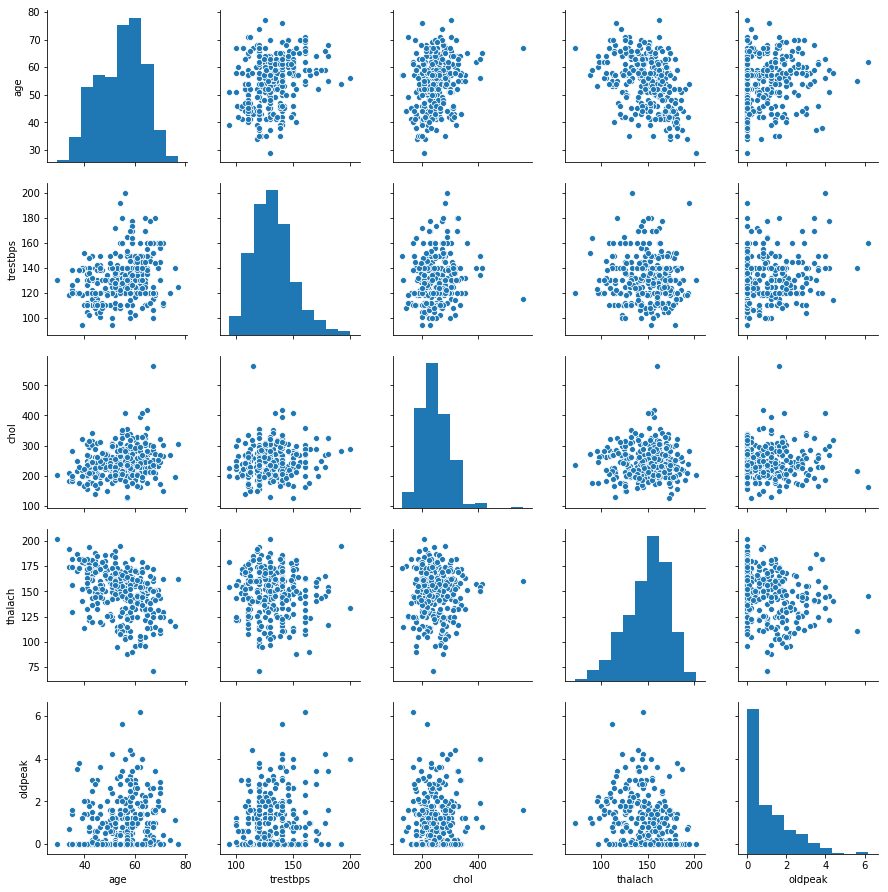

In [127]:
#Let's create pairwise scatterplots
df3 = heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]


plt.figure(figsize = (15,12))
sns.pairplot(df3)
plt.show()

In [128]:
#correlation between the variables

cor = heart.corr()
round(cor,2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


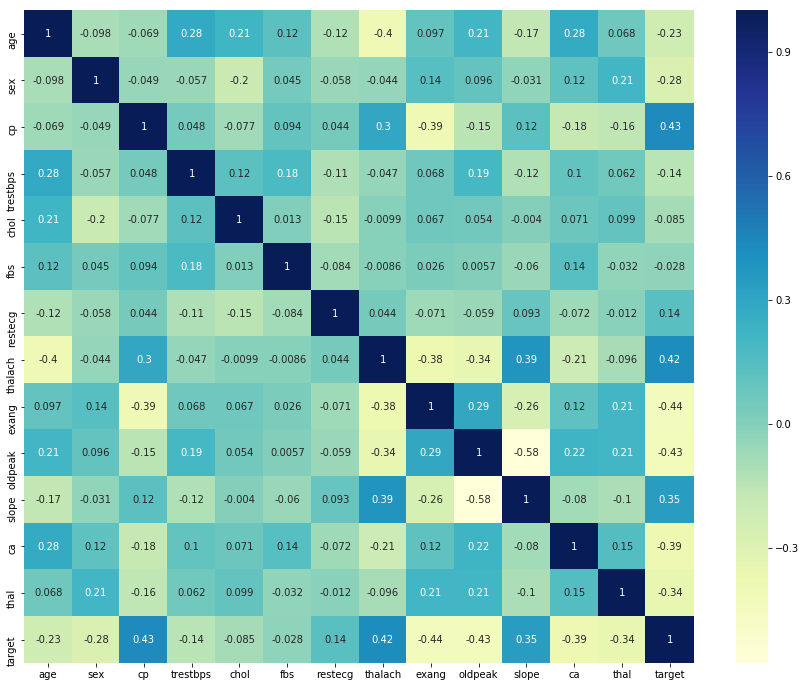

In [129]:
#Making heatmap to understand the correlation better

plt.figure(figsize= (15,12))

sns.heatmap(cor, cmap = 'YlGnBu', annot = True)
plt.show()

#We can see that there is a positive correlation between the target and cp, thalach and slope.
#There is a negative correaltion between target and age, gender, oldpeak, thal etc. 

In [130]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [131]:
for col in ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']:
    heart[col]= heart[col].astype('category')

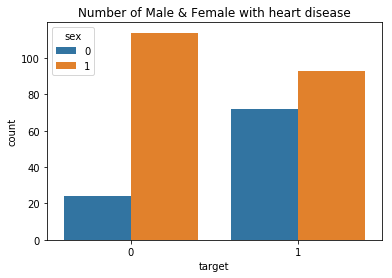

In [132]:
#Now let's look at some categorical data.

#Gender
sns.countplot(x='target', data = heart, hue = 'sex')
plt.title('Number of Male & Female with heart disease')
plt.show()

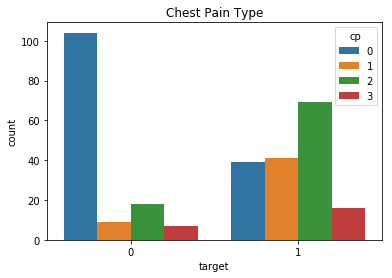

In [133]:
#Chest Pain type

sns.countplot(x='target', hue= 'cp',data = heart)
plt.title('Chest Pain Type')
plt.show()

#There are 4 types of chest pain(0,1,2,3) out of which cp = 2 is the most common type of chest pain in case of people who have heart disease.
#Those who do not have a heart disease experience cp = 0 type of chest pain.

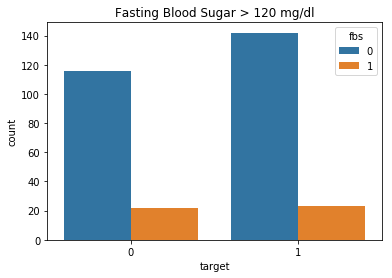

In [134]:
#fbs (Fasting Blood Sugar > 120 mg/dl)

sns.countplot(hue='fbs',x ='target',data = heart)
plt.title('Fasting Blood Sugar > 120 mg/dl')
plt.show()

#Patients with heart disease doesn't necessarily have fbs >120 mg/dl.  

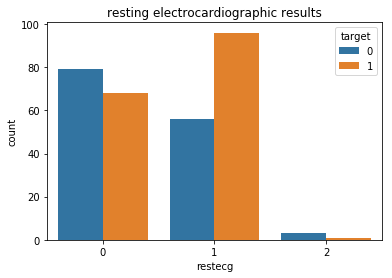

In [135]:
#restecg(resting electrocardiographic results (values 0,1,2))

sns.countplot(x='restecg',hue ='target',data = heart)
plt.title('resting electrocardiographic results')
plt.show()

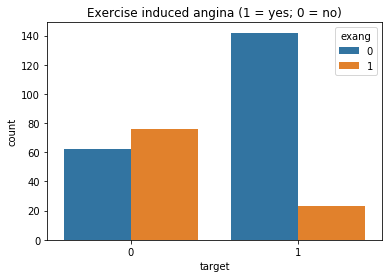

In [136]:
#exang- Exercise induced angina (1 = yes; 0 = no)

sns.countplot(hue='exang',x ='target',data = heart)
plt.title('Exercise induced angina (1 = yes; 0 = no)')
plt.show()

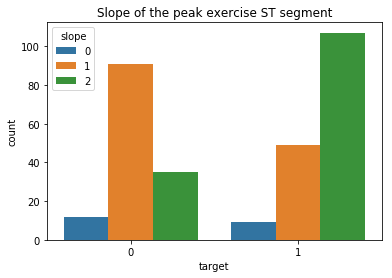

In [137]:
#the slope of the peak exercise ST segment

sns.countplot(hue='slope',x ='target',data = heart)
plt.title('Slope of the peak exercise ST segment')
plt.show()

#Most of the patients who have a heart disease have a slope = 2

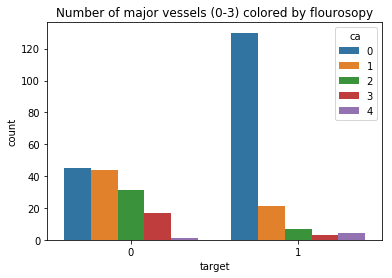

In [138]:
#ca- number of major vessels (0-3) colored by flourosopy

sns.countplot(hue='ca',x ='target',data = heart)
plt.title('Number of major vessels (0-3) colored by flourosopy')
plt.show()

#Most of the patients who have a heart disease have a ca = 0

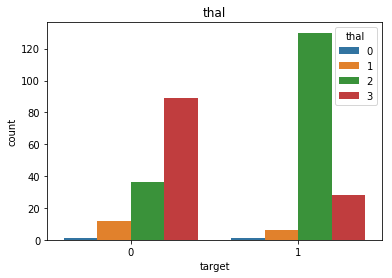

In [139]:
#thal- no explanation provided, but probably thalassemia (3 normal; 6 fixed defect; 7 reversable defect)

sns.countplot(hue='thal',x ='target',data = heart)
plt.title('thal')
plt.show()

#Most of the patients who have a heart disease have a thal = 2

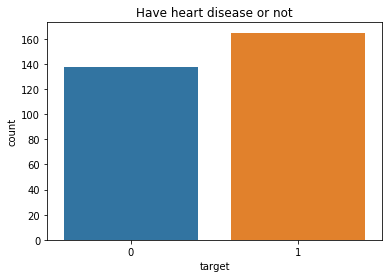

In [140]:
#Target

sns.countplot(x ='target',data = heart)
plt.title('Have heart disease or not')
plt.show()

In Progress